In [1]:
!pip install keras

In [2]:
#Librerias
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
import random
from shutil import rmtree
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.callbacks import TensorBoard
from keras.utils import to_categorical
#from keras_preprocessing.image import load_img, img_to_array, array_to_img, save_img

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#NHS TIPO NIC1 SEG
#307
image_ids_array = ['I264211_C1.jpg', 'I169320_C2.jpg', 'I166612_C1.jpg', 'I169320_C1.jpg', 'I166612_C2.jpg', 'I150818_C2.jpg', 'I150818_C1.jpg', 'I149745_C2.jpg', 'I149745_C1.jpg', 'I133591_C2.jpg', 'I126100_C1.jpg', 'I133591_C1.jpg', 'I126100_C2.jpg', 'I124361_C1.jpg', 'I103738_C1.jpg', 'I103738_C2.jpg', 'I124361_C2.jpg', 'I124032_C2.jpg', 'I124032_C1.jpg', 'I264211_C2.jpg', 'I342192_C2.jpg', 'I342192_C1.jpg', 'I339977_C2.jpg', 'I335731_C2.jpg', 'I326517_C1.jpg', 'I324210_C2.jpg', 'I339977_C1.jpg', 'I335731_C1.jpg', 'I326517_C2.jpg', 'I324210_C1.jpg', 'I298042_C2.jpg', 'I295650_C1.jpg', 'I295650_C2.jpg', 'I293440_C1.jpg', 'I274386_C2.jpg', 'I293440_C2.jpg', 'I313616_C2.jpg', 'I298042_C1.jpg', 'I313616_C1.jpg', 'I274386_C1.jpg', 'I522521_C1.jpg', 'I517492_C2.jpg', 'I493937_C1.jpg', 'I493937_C2.jpg', 'I517492_C1.jpg', 'I505766_C2.jpg', 'I505766_C1.jpg', 'I474789_C1.jpg', 'I478042_C1.jpg', 'I478042_C2.jpg', 'I474789_C2.jpg', 'I466728_C2.jpg', 'I466728_C1.jpg', 'I437637_C1.jpg', 'I437637_C2.jpg', 'I371059_C2.jpg', 'I368134_C2.jpg', 'I368134_C1.jpg', 'I371059_C1.jpg', 'I352381_C2.jpg', 'I352381_C1.jpg', 'I635482_C1.jpg', 'I633710_C1.jpg', 'I633710_C2.jpg', 'I630618_C1.jpg', 'I630618_C2.jpg', 'I608976_C2.jpg', 'I608935_C1.jpg', 'I608976_C1.jpg', 'I608935_C2.jpg', 'I595301_C2.jpg', 'I592231_C2.jpg', 'I592231_C1.jpg', 'I595301_C1.jpg', 'I584458_C1.jpg', 'I584458_C2.jpg', 'I580816_C1.jpg', 'I580149_C1.jpg', 'I580816_C2.jpg', 'I580149_C2.jpg', 'I545787_C2.jpg', 'I579989_C1.jpg', 'I535966_C2.jpg', 'I545787_C1.jpg', 'I579989_C2.jpg', 'I535966_C1.jpg', 'I527027_C1.jpg', 'I527027_C2.jpg', 'I522521_C2.jpg', 'I743469_C1.jpg', 'I743435_C2.jpg', 'I704275_C2.jpg', 'I743333_C1.jpg', 'I677963_C1.jpg', 'I702418_C1.jpg', 'I691209_C2.jpg', 'I743333_C2.jpg', 'I702418_C2.jpg', 'I704275_C1.jpg', 'I691209_C1.jpg', 'I677963_C2.jpg', 'I662039_C1.jpg', 'I643611_C1.jpg', 'I672531_C1.jpg', 'I662039_C2.jpg', 'I672531_C2.jpg', 'I668441_C2.jpg', 'I668441_C1.jpg', 'I643611_C2.jpg', 'I635482_C2.jpg', 'I743893_C1.jpg', 'I743892_C2.jpg', 'I743892_C1.jpg', 'I743874_C1.jpg', 'I743834_C2.jpg', 'I743874_C2.jpg', 'I743834_C1.jpg', 'I743827_C2.jpg', 'I743714_C2.jpg', 'I743827_C1.jpg', 'I743704_C2.jpg', 'I743635_C2.jpg', 'I743624_C1.jpg', 'I743624_C2.jpg', 'I743635_C1.jpg', 'I743507_C1.jpg', 'I743507_C2.jpg', 'I743622_C2.jpg', 'I743550_C1.jpg', 'I743622_C1.jpg', 'I743476_C2.jpg', 'I744362_C1.jpg', 'I744351_C1.jpg', 'I744351_C2.jpg', 'I744335_C2.jpg', 'I744345_C2.jpg', 'I744345_C1.jpg', 'I744294_C2.jpg', 'I744335_C1.jpg', 'I744294_C1.jpg', 'I744206_C2.jpg', 'I744175_C1.jpg', 'I744206_C1.jpg', 'I744114_C2.jpg', 'I744131_C1.jpg', 'I744175_C2.jpg', 'I744129_C1.jpg', 'I744131_C2.jpg', 'I744129_C2.jpg', 'I744114_C1.jpg', 'I744029_C2.jpg', 'I743893_C2.jpg', 'I743951_C2.jpg', 'I743951_C1.jpg', 'I744029_C1.jpg', 'I744074_C2.jpg', 'I744074_C1.jpg', 'I744068_C2.jpg', 'I744068_C1.jpg', 'I744722_C1.jpg', 'I744694_C2.jpg', 'I744691_C2.jpg', 'I744694_C1.jpg', 'I744691_C1.jpg', 'I744599_C2.jpg', 'I744606_C2.jpg', 'I744606_C1.jpg', 'I744624_C2.jpg', 'I744624_C1.jpg', 'I744599_C1.jpg', 'I744548_C2.jpg', 'I744457_C2.jpg', 'I744443_C2.jpg', 'I744472_C2.jpg', 'I744457_C1.jpg', 'I744548_C1.jpg', 'I744406_C2.jpg', 'I744472_C1.jpg', 'I744406_C1.jpg', 'I744443_C1.jpg', 'I744362_C2.jpg', 'I745157_C1.jpg', 'I745139_C2.jpg', 'I745136_C2.jpg', 'I745139_C1.jpg', 'I745136_C1.jpg', 'I745096_C2.jpg', 'I745085_C2.jpg', 'I745092_C2.jpg', 'I745096_C1.jpg', 'I745092_C1.jpg', 'I745024_C2.jpg', 'I745047_C2.jpg', 'I745047_C1.jpg', 'I745085_C1.jpg', 'I745024_C1.jpg', 'I744912_C2.jpg', 'I744912_C1.jpg', 'I744778_C2.jpg', 'I744751_C2.jpg', 'I744751_C1.jpg', 'I744722_C2.jpg', 'I744732_C2.jpg', 'I744778_C1.jpg', 'I744732_C1.jpg', 'I745824_C2.jpg', 'I745838_C2.jpg', 'I745838_C1.jpg', 'I745847_C1.jpg', 'I745796_C1.jpg', 'I745824_C1.jpg', 'I745791_C2.jpg', 'I745796_C2.jpg', 'I745756_C1.jpg', 'I745743_C1.jpg', 'I745709_C1.jpg', 'I745308_C1.jpg', 'I745543_C1.jpg', 'I745308_C2.jpg', 'I745562_C1.jpg', 'I745484_C2.jpg', 'I745290_C1.jpg', 'I745266_C1.jpg', 'I745290_C2.jpg', 'I745266_C2.jpg', 'I745232_C2.jpg', 'I745157_C2.jpg', 'I745165_C2.jpg', 'I745165_C1.jpg', 'I745232_C1.jpg', 'I746524_C1.jpg', 'I746431_C1.jpg', 'I746360_C2.jpg', 'I746360_C1.jpg', 'I746308_C2.jpg', 'I746308_C1.jpg', 'I746274_C2.jpg', 'I746259_C1.jpg', 'I746123_C1.jpg', 'I746123_C2.jpg', 'I746174_C2.jpg', 'I746072_C1.jpg', 'I746035_C2.jpg', 'I746035_C1.jpg', 'I746072_C2.jpg', 'I745983_C2.jpg', 'I745930_C2.jpg', 'I745957_C1.jpg', 'I745930_C1.jpg', 'I745847_C2.jpg', 'I745886_C2.jpg', 'I745957_C2.jpg', 'I745983_C1.jpg', 'I745964_C2.jpg', 'I745964_C1.jpg', 'I745886_C1.jpg', 'I750994_C1.jpg', 'I747684_C1.jpg', 'I751566_C1.jpg', 'I751566_C2.jpg', 'I753457_C1.jpg', 'I750994_C2.jpg', 'I753457_C2.jpg', 'I747104_C2.jpg', 'I747104_C1.jpg', 'I747028_C2.jpg', 'I746771_C2.jpg', 'I746614_C2.jpg', 'I746614_C1.jpg', 'I746692_C2.jpg', 'I746596_C1.jpg', 'I746556_C1.jpg', 'I746566_C2.jpg', 'I746692_C1.jpg', 'I746556_C2.jpg', 'I746539_C1.jpg', 'I746566_C1.jpg', 'I746524_C2.jpg', 'I746539_C2.jpg', 'I746431_C2.jpg', 'I860432_C2.jpg', 'I860432_C1.jpg', 'I858460_C2.jpg', 'I858460_C1.jpg', 'I836429_C2.jpg', 'I845923_C1.jpg', 'I850562_C1.jpg', 'I849456_C2.jpg', 'I850562_C2.jpg', 'I849456_C1.jpg', 'I845923_C2.jpg', 'I836429_C1.jpg', 'I802100_C1.jpg', 'I782433_C1.jpg', 'I810715_C1.jpg', 'I765390_C2.jpg', 'I765390_C1.jpg', 'I763975_C1.jpg', 'I802100_C2.jpg', 'I810715_C2.jpg', 'I763975_C2.jpg', 'I875628_C1.jpg', 'I862260_C1.jpg', 'I875628_C2.jpg', 'I874390_C2.jpg', 'I874390_C1.jpg', 'I862260_C2.jpg']
print(len(image_ids_array))

307


In [5]:
#Cargar Dataset CITOBOT
url="/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/PruebasCITOBOT_Anon.csv"
data1 = pd.read_csv(url, header=0)

data1.columns = ['CASE_NUMBER', 'CASE_ID', 'IMAGE_ID', 'PATH', 'DIAGN']
data1 = data1.loc[data1['CASE_NUMBER'] <= 'Case 223']
data1['PATH'] = data1['PATH'].str.replace("PruebasCITOBOT_Anon/", "PruebasCITOBOT_AnonSEG/")
data1 = data1[data1['CASE_NUMBER'] != 'Case 169']
data1['DIAGN'] = data1['DIAGN'].replace({3: 2})
data1['DIAGN'] = data1['DIAGN'].replace({4: 2})
data1 = data1[data1['DIAGN'] != 5]
print(data1['DIAGN'].value_counts())
data1

0    265
1    116
2     34
Name: DIAGN, dtype: int64


,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
0,Case 001,2,20230411101755.jpg,PruebasCITOBOT_AnonSEG/Case 001/,0
1,Case 001,2,20230411101702.jpg,PruebasCITOBOT_AnonSEG/Case 001/,0
2,Case 002,2,20230411100907.jpg,PruebasCITOBOT_AnonSEG/Case 002/,0
3,Case 002,2,20230411100934.jpg,PruebasCITOBOT_AnonSEG/Case 002/,0
4,Case 003,2,20230411100207.jpg,PruebasCITOBOT_AnonSEG/Case 003/,0
...,...,...,...,...,...
505,Case 220,2,20230530100347.jpg,PruebasCITOBOT_AnonSEG/Case 220/,1
506,Case 221,2,20230530094711.jpg,PruebasCITOBOT_AnonSEG/Case 221/,0
507,Case 221,2,20230530094612.jpg,PruebasCITOBOT_AnonSEG/Case 221/,0
511,Case 223,2,20230530093319.jpg,PruebasCITOBOT_AnonSEG/Case 223/,0


In [6]:
#Cargar Dataset WHO
url2="/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/Dataset_WHOSeg.csv"
data2 = pd.read_csv(url2, header=0)

data2.columns = ['CASE_NUMBER', 'CASE_ID', 'IMAGE_ID', 'PATH', 'DIAGN']
data2 = data2.drop(data2[data2.IMAGE_ID == "AAJK5.jpg"].index)
data2['DIAGN'] = data2['DIAGN'].replace({3: 2})
print(data2['DIAGN'].value_counts())
data2

2    464
1    133
0    124
Name: DIAGN, dtype: int64


,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
0,14.0,AAHE,AAHE.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
1,14.0,AAHE,AAHE0.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
2,14.0,AAHE,AAHE1.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
3,14.0,AAHE,AAHE3.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
4,14.0,AAHE,AAHE4.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
...,...,...,...,...,...
717,184.0,AEU,AEU1.jpg,WHO_SEG/IARCImageBankVIA/Case 184/,2
718,185.0,ADF,ADF0.jpg,WHO_SEG/IARCImageBankVIA/Case 185/,2
719,185.0,ADF,ADF1.jpg,WHO_SEG/IARCImageBankVIA/Case 185/,2
720,186.0,ABK,ABK0.jpg,WHO_SEG/IARCImageBankVIA/Case 186/,2


In [7]:
#Cargar Dataset NCI
url3="/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/trainingDatasetSEG.csv"
data3 = pd.read_csv(url3, header=0)

data3.columns = ['PATIENT_IDR', 'IMAGE_ID', 'AGE_GRP', 'WRST_HIST_AFTER', 'WRST_HIST_AFTER_DT', 'HPV_STATUS', 'HPV_DT', 'TIMEPNT', 'PATH']

#Imagenes que no estan segmentadas =================================
data3 = data3.drop(data3[data3.IMAGE_ID == "I770636_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I862299_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I344141_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I741415_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I584615_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I325700_C1.jpg"].index)
#===================================================================

data3 = data3[((data3['PATH'] == 'training_SEG/Biopsy_Study/') & (data3['WRST_HIST_AFTER'].isin([0, 1]))) | ((data3['PATH'] == 'training_SEG/NHS/') & (data3['WRST_HIST_AFTER'] == 0))]
data3 = data3.rename(columns={'WRST_HIST_AFTER': 'DIAGN'})
data3 = data3.rename(columns={'PATIENT_IDR': 'CASE_NUMBER'})
data3 = data3.rename(columns={'AGE_GRP': 'CASE_ID'})
data3 = data3.drop('WRST_HIST_AFTER_DT', axis=1)
data3 = data3.drop('HPV_STATUS', axis=1)
data3 = data3.drop('HPV_DT', axis=1)
data3 = data3.drop('TIMEPNT', axis=1)
data3 = data3.reindex(columns=['CASE_NUMBER', 'CASE_ID', 'IMAGE_ID', 'PATH', 'DIAGN'])
#dataC1 = data3[data3['DIAGN'] == 0]
#dataC2 = data3[data3['DIAGN'] == 1]
#data_aleatoria = dataC1.sample(n=531)
#data_aleatoria2 = dataC2.sample(n=58)
#data3 = pd.concat([data_aleatoria, data_aleatoria2])
print(data3['DIAGN'].value_counts())
data3

0    531
1    192
Name: DIAGN, dtype: int64


,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
0,P100316,2,I389059.jpg,training_SEG/Biopsy_Study/,1
1,P101187,2,I687505.jpg,training_SEG/Biopsy_Study/,0
4,P110406,5,I239297.jpg,training_SEG/Biopsy_Study/,0
5,P111612,5,I545805.jpg,training_SEG/Biopsy_Study/,1
6,P115183,4,I149285.jpg,training_SEG/Biopsy_Study/,0
...,...,...,...,...,...
76652,P899409,5,I325700_C2.jpg,training_SEG/NHS/,0
76653,P899409,5,I553280_C1.jpg,training_SEG/NHS/,0
76654,P899409,5,I553280_C2.jpg,training_SEG/NHS/,0
76655,P899409,5,I853803_C1.jpg,training_SEG/NHS/,0


In [8]:
#Cargar Dataset Kaggle
url4="/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/kaggleDataset_SEG.csv"
data4 = pd.read_csv(url4, header=0)

data4.columns = ['CASE_NUMBER', 'CASE_ID', 'IMAGE_ID', 'PATH', 'DIAGN']
#data4['DIAGN'] = data4['DIAGN'].replace({2: 1})
dataC0 = data4[data4['DIAGN'] == 0]
dataC1 = data4[data4['DIAGN'] == 1]
dataC2 = data4[data4['DIAGN'] == 2]
data_aleatoria0 = dataC0.sample(n=244)
data_aleatoria1 = dataC1.sample(n=574)
data_aleatoria2 = dataC2.sample(n=435)
data4 = pd.concat([data_aleatoria0, data_aleatoria1, data_aleatoria2])
print(data4['DIAGN'].value_counts())
data4

1    574
2    435
0    244
Name: DIAGN, dtype: int64


,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
227,0,0,889.jpg,Kaggle_SEG/Type_1/,0
38,0,0,1220.jpg,Kaggle_SEG/Type_1/,0
160,0,0,553.jpg,Kaggle_SEG/Type_1/,0
132,0,0,425.jpg,Kaggle_SEG/Type_1/,0
232,0,0,917.jpg,Kaggle_SEG/Type_1/,0
...,...,...,...,...,...
1282,0,0,459.jpg,Kaggle_SEG/Type_3/,2
1324,0,0,598.jpg,Kaggle_SEG/Type_3/,2
1264,0,0,391.jpg,Kaggle_SEG/Type_3/,2
1089,0,0,1207.jpg,Kaggle_SEG/Type_3/,2


In [9]:
data = pd.concat([data2, data3, data4])
data

,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
0,14.0,AAHE,AAHE.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
1,14.0,AAHE,AAHE0.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
2,14.0,AAHE,AAHE1.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
3,14.0,AAHE,AAHE3.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
4,14.0,AAHE,AAHE4.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
...,...,...,...,...,...
1282,0,0,459.jpg,Kaggle_SEG/Type_3/,2
1324,0,0,598.jpg,Kaggle_SEG/Type_3/,2
1264,0,0,391.jpg,Kaggle_SEG/Type_3/,2
1089,0,0,1207.jpg,Kaggle_SEG/Type_3/,2


In [10]:
#Distribuir clases (3)
print(data['DIAGN'].value_counts())

0    899
1    899
2    899
Name: DIAGN, dtype: int64


In [11]:
#Balancear Clase de Salida.
#g = data.groupby('DIAGN')
#dataBal = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
#data = dataBal
#print(data['DIAGN'].value_counts())

In [12]:
#Procesar y Cargar Imagenes

def process_image(filepath):
  img = tf.io.read_file(filepath)
  img = tf.image.decode_jpeg(img)
  img = tf.image.resize(img, [224, 224])
  img = tf.image.rgb_to_grayscale(img)  # convertir a escala de grises
  img = tf.image.convert_image_dtype(img, tf.float32)  # convertir a tipo float32
  img /= 255.0  # Normalizar píxeles al rango [0, 1]
  return img

In [13]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range = 40,
    zoom_range = 0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    vertical_flip = True
)

In [14]:
#Arquitectura AlexNet
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Conv2D, MaxPooling2D,Flatten,BatchNormalization

def modelCompile():
  model = Sequential()
  model.add(Conv2D(96, (11, 11), strides=(4, 4), input_shape=(224,224,1), padding='valid', activation='relu',
                    kernel_initializer='uniform'))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
  model.add(Conv2D(256, (5, 5), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform'))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
  model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform'))
  model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform'))
  model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform'))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
  model.add(Flatten())
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(3, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), metrics=['accuracy'])
  return model

model = modelCompile()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        11712     
                                                                 
 max_pooling2d (MaxPooling2  (None, 26, 26, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 384)       1

Iteracion:  1
Epoch 1/150
54/54 [==============================] - 13s 140ms/step - loss: 1.1154 - accuracy: 0.3687 - val_loss: 1.0841 - val_accuracy: 0.4306
Epoch 2/150
54/54 [==============================] - 7s 131ms/step - loss: 1.0779 - accuracy: 0.4012 - val_loss: 1.0427 - val_accuracy: 0.4606
Epoch 3/150
54/54 [==============================] - 7s 131ms/step - loss: 1.0445 - accuracy: 0.4614 - val_loss: 1.0325 - val_accuracy: 0.4583
Epoch 4/150
54/54 [==============================] - 7s 125ms/step - loss: 1.0092 - accuracy: 0.4968 - val_loss: 1.0499 - val_accuracy: 0.4491
Epoch 5/150
54/54 [==============================] - 7s 130ms/step - loss: 1.0095 - accuracy: 0.5032 - val_loss: 1.0297 - val_accuracy: 0.4815
Epoch 6/150
54/54 [==============================] - 7s 129ms/step - loss: 0.9654 - accuracy: 0.5130 - val_loss: 0.9296 - val_accuracy: 0.5694
Epoch 7/150
54/54 [==============================] - 7s 131ms/step - loss: 0.9371 - accuracy: 0.5443 - val_loss: 0.9801 - val_a

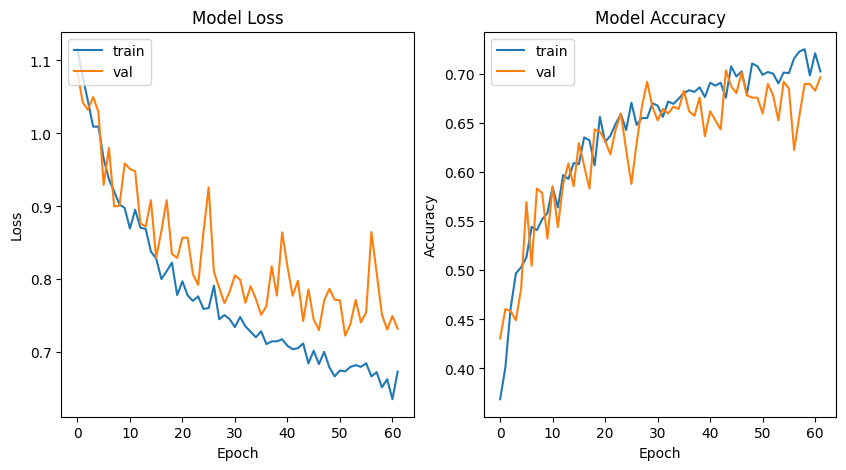

17/17 [==============================] - 12s 709ms/step
Clase 0:
Especificidad: 0.9325842696629213
Sensibilidad: 0.6195652173913043

Clase 1:
Especificidad: 0.7617728531855956
Sensibilidad: 0.7597765363128491

Clase 2:
Especificidad: 0.8567493112947658
Sensibilidad: 0.7231638418079096


Matriz de Confusión:
[[114  44  26]
 [ 17 136  26]
 [  7  42 128]]
Specificity:  [0.9325842696629213, 0.7617728531855956, 0.8567493112947658]
Sensitivity:  [0.6195652173913043, 0.7597765363128491, 0.7231638418079096]
Accuracy:  0.7
Precision:  [0.82608696 0.61261261 0.71111111]
Recall:     [0.61956522 0.75977654 0.72316384]
F1score:    [0.70807453 0.67830424 0.71708683]
Iteracion:  2
Epoch 1/150
54/54 [==============================] - 9s 135ms/step - loss: 1.0969 - accuracy: 0.3942 - val_loss: 1.0738 - val_accuracy: 0.4375
Epoch 2/150
54/54 [==============================] - 7s 133ms/step - loss: 1.0844 - accuracy: 0.4087 - val_loss: 1.0574 - val_accuracy: 0.4167
Epoch 3/150
54/54 [====================

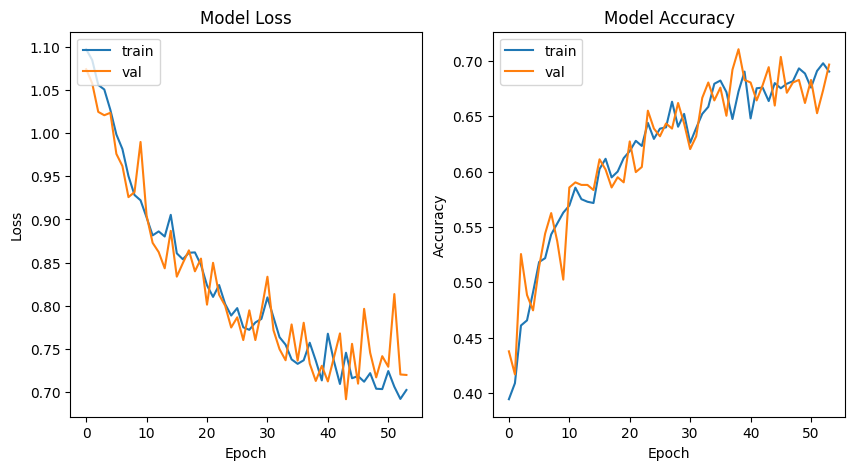

17/17 [==============================] - 13s 718ms/step
Clase 0:
Especificidad: 0.8919667590027701
Sensibilidad: 0.6703910614525139

Clase 1:
Especificidad: 0.8342541436464088
Sensibilidad: 0.5786516853932584

Clase 2:
Especificidad: 0.7899159663865546
Sensibilidad: 0.7814207650273224


Matriz de Confusión:
[[120  32  27]
 [ 27 103  48]
 [ 12  28 143]]
Specificity:  [0.8919667590027701, 0.8342541436464088, 0.7899159663865546]
Sensitivity:  [0.6703910614525139, 0.5786516853932584, 0.7814207650273224]
Accuracy:  0.6777777777777778
Precision:  [0.75471698 0.63190184 0.6559633 ]
Recall:     [0.67039106 0.57865169 0.78142077]
F1score:    [0.71005917 0.60410557 0.71321696]
Iteracion:  3
Epoch 1/150
54/54 [==============================] - 10s 141ms/step - loss: 1.1157 - accuracy: 0.3565 - val_loss: 1.0799 - val_accuracy: 0.4282
Epoch 2/150
54/54 [==============================] - 7s 134ms/step - loss: 1.0737 - accuracy: 0.4209 - val_loss: 1.0573 - val_accuracy: 0.4676
Epoch 3/150
54/54 [====

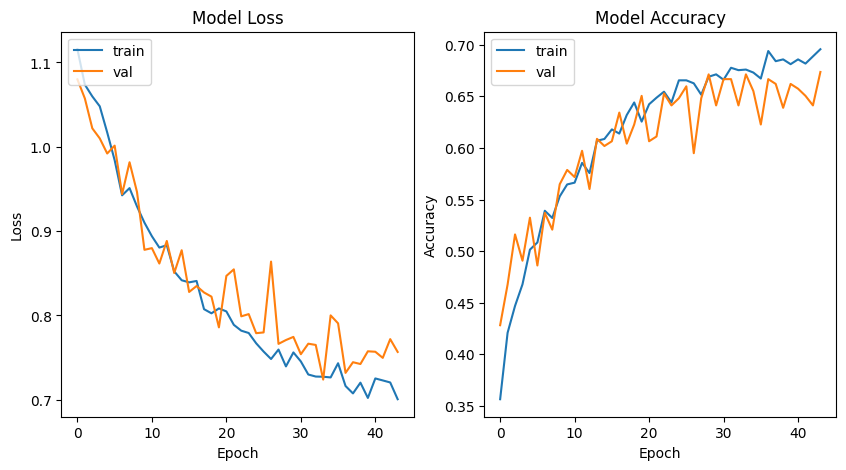

17/17 [==============================] - 13s 766ms/step
Clase 0:
Especificidad: 0.9413333333333334
Sensibilidad: 0.5333333333333333

Clase 1:
Especificidad: 0.7456140350877193
Sensibilidad: 0.7272727272727273

Clase 2:
Especificidad: 0.8099173553719008
Sensibilidad: 0.7344632768361582


Matriz de Confusión:
[[ 88  47  30]
 [ 15 144  39]
 [  7  40 130]]
Specificity:  [0.9413333333333334, 0.7456140350877193, 0.8099173553719008]
Sensitivity:  [0.5333333333333333, 0.7272727272727273, 0.7344632768361582]
Accuracy:  0.6703703703703704
Precision:  [0.8        0.62337662 0.65326633]
Recall:     [0.53333333 0.72727273 0.73446328]
F1score:    [0.64       0.67132867 0.69148936]
Iteracion:  4
Epoch 1/150
54/54 [==============================] - 10s 141ms/step - loss: 1.1042 - accuracy: 0.3757 - val_loss: 1.0781 - val_accuracy: 0.4167
Epoch 2/150
54/54 [==============================] - 7s 135ms/step - loss: 1.0693 - accuracy: 0.4267 - val_loss: 1.0564 - val_accuracy: 0.4282
Epoch 3/150
54/54 [====

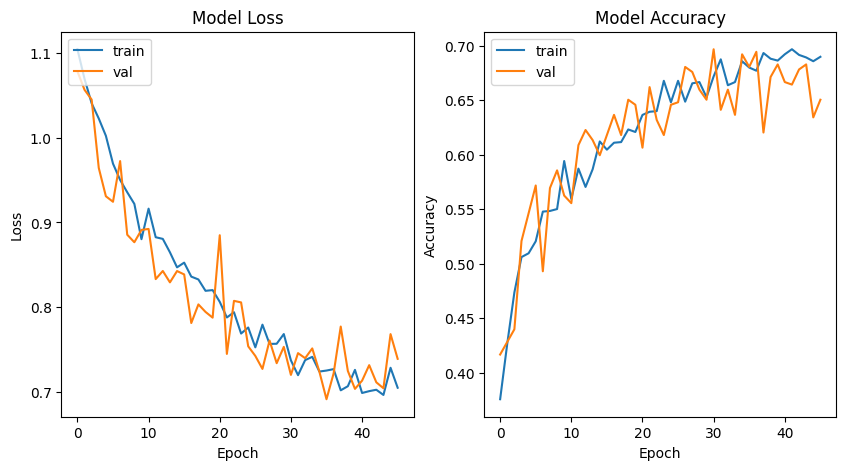

17/17 [==============================] - 13s 729ms/step
Clase 0:
Especificidad: 0.9357541899441341
Sensibilidad: 0.5604395604395604

Clase 1:
Especificidad: 0.7908309455587392
Sensibilidad: 0.6701570680628273

Clase 2:
Especificidad: 0.7882037533512064
Sensibilidad: 0.8083832335329342


Matriz de Confusión:
[[102  50  30]
 [ 14 128  49]
 [  9  23 135]]
Specificity:  [0.9357541899441341, 0.7908309455587392, 0.7882037533512064]
Sensitivity:  [0.5604395604395604, 0.6701570680628273, 0.8083832335329342]
Accuracy:  0.6759259259259259
Precision:  [0.816      0.63681592 0.63084112]
Recall:     [0.56043956 0.67015707 0.80838323]
F1score:    [0.66449511 0.65306122 0.70866142]
Iteracion:  5
Epoch 1/150
54/54 [==============================] - 10s 142ms/step - loss: 1.1082 - accuracy: 0.3687 - val_loss: 1.0678 - val_accuracy: 0.4120
Epoch 2/150
54/54 [==============================] - 7s 135ms/step - loss: 1.0729 - accuracy: 0.4301 - val_loss: 1.0661 - val_accuracy: 0.3588
Epoch 3/150
54/54 [====

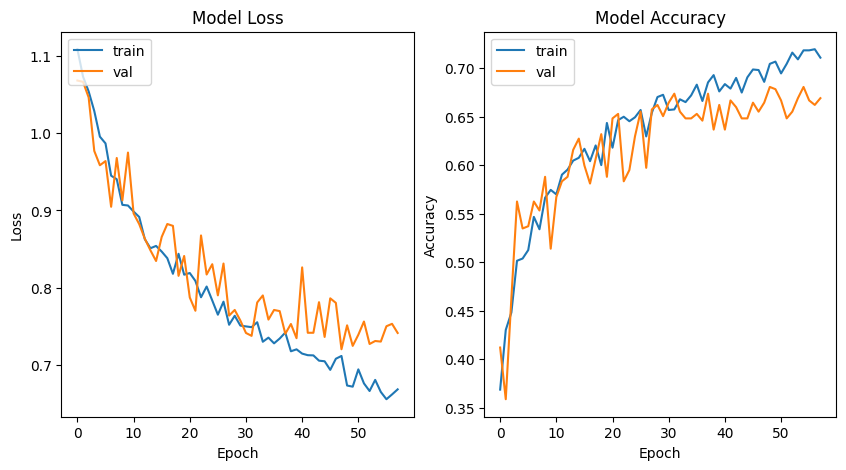

17/17 [==============================] - 13s 732ms/step
Clase 0:
Especificidad: 0.864
Sensibilidad: 0.7090909090909091

Clase 1:
Especificidad: 0.8531073446327684
Sensibilidad: 0.6129032258064516

Clase 2:
Especificidad: 0.8148148148148148
Sensibilidad: 0.746031746031746


Matriz de Confusión:
[[117  29  19]
 [ 26 114  46]
 [ 25  23 141]]
Specificity:  [0.864, 0.8531073446327684, 0.8148148148148148]
Sensitivity:  [0.7090909090909091, 0.6129032258064516, 0.746031746031746]
Accuracy:  0.6888888888888889
Precision:  [0.69642857 0.68674699 0.68446602]
Recall:     [0.70909091 0.61290323 0.74603175]
F1score:    [0.7027027  0.64772727 0.71392405]
Media
Specificity:  [0.91312771 0.79711586 0.81192024]  |  Sensitivity:  [0.61856402 0.66975225 0.75869257]
Accuracy:  0.6825925925925926  |  Precision:  0.6946889586897824  |  Recall:  0.6823362791861203  |  F1score:  0.6816158082840559

Desviacion
Specificity:  [0.03015755 0.04112266 0.02477376]  |  Sensitivity:  [0.06561232 0.06774107 0.03160816]


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

HOLDOUT = 5

specVec,sensVec,accuVec,precVec,recVec,f1Vec=[],[],[],[],[],[]

for i in range(HOLDOUT):
  print("Iteracion: ",i+1)
  #Conjutnos de Train, Validation y Test
  x_trainPath, x_testPath, y_trainPath, y_testPath = train_test_split(data, data['DIAGN'], test_size=0.2)
  x_trainPath, x_valPath, y_trainPath, y_valPath = train_test_split(x_trainPath, y_trainPath, test_size=0.2)

  y_trainPath = np.array(y_trainPath)
  y_testPath = np.array(y_testPath)
  y_valPath = np.array(y_valPath)

  #Cargar los path de las imagenes para el pipeline
  dataPathDrive = '/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/'
  path_train = dataPathDrive + x_trainPath["PATH"] + x_trainPath['IMAGE_ID']
  path_test = dataPathDrive + x_testPath["PATH"] + x_testPath['IMAGE_ID']
  path_val = dataPathDrive + x_valPath["PATH"] + x_valPath['IMAGE_ID']

  path_train = np.array(path_train)
  path_test = np.array(path_test)
  path_val = np.array(path_val)

  #Convertir en tensores
  data_train = tf.data.Dataset.from_tensor_slices(path_train)
  data_test = tf.data.Dataset.from_tensor_slices(path_test)
  data_val = tf.data.Dataset.from_tensor_slices(path_val)

  #Procesar y Cargar Imagenes
  data_train = data_train.map(process_image)
  data_test = data_test.map(process_image)
  data_val = data_val.map(process_image)

  train = tf.data.Dataset.from_tensor_slices(to_categorical(y_trainPath, 3))
  train = tf.data.Dataset.zip((data_train,train))

  test = tf.data.Dataset.from_tensor_slices(to_categorical(y_testPath, 3))
  test = tf.data.Dataset.zip((data_test,test))

  val = tf.data.Dataset.from_tensor_slices(to_categorical(y_valPath, 3))
  val = tf.data.Dataset.zip((data_val,val))

  AS = train.batch(batch_size=32)
  AST = test.batch(batch_size=32)
  ASV = val.batch(batch_size=32)

  #Aplicar aumento de datos
  x_train = np.array(list(data_train.as_numpy_iterator()))
  y_train = np.array(list(train.as_numpy_iterator()), dtype=object)
  y_train = np.array([y[1] for y in y_train])

  x_val = np.array(list(data_val.as_numpy_iterator()))
  y_val = np.array(list(val.as_numpy_iterator()), dtype=object)
  y_val = np.array([y[1] for y in y_val])

  data_gen_train = datagen.flow(x_train, y_train, batch_size=32)
  data_gen_val = datagen.flow(x_val, y_val, batch_size=32)

  #Cargar Modelo
  model = modelCompile()

  #Entrenar
  callbackMed=tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0,
        patience=10,
        verbose=0,
        mode='auto',
        baseline=None,
        restore_best_weights=True
    )

  history = model.fit(data_gen_train, epochs=150, verbose=1, validation_data= data_gen_val, callbacks=[callbackMed, TensorBoard(log_dir='./cnntmp/log')])

  #Grafica Rendimiento ========================================
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

  ax1.plot(history.history['loss'])
  ax1.plot(history.history['val_loss'])
  ax1.set_title('Model Loss')
  ax1.set_ylabel('Loss')
  ax1.set_xlabel('Epoch')
  ax1.legend(['train', 'val'], loc='upper left')

  ax2.plot(history.history['accuracy'])
  ax2.plot(history.history['val_accuracy'])
  ax2.set_title('Model Accuracy')
  ax2.set_ylabel('Accuracy')
  ax2.set_xlabel('Epoch')
  ax2.legend(['train', 'val'], loc='upper left')
  plt.show()
  #===========================================================
  model.evaluate(AST)
  pred = model.predict(AST)

  y_testPath = list(y_testPath)
  pred_label=[np.argmax(pred[i]) for i in range(pred.shape[0])]

  mat=confusion_matrix(y_testPath, pred_label)

  num_classes = len(set(y_testPath))
  specificity = []
  sensitivity = []
  for i in range(num_classes):
      tp = mat[i, i]
      tn = sum(sum(mat) - mat[i, :] - mat[:, i]) + tp
      fp = sum(mat[:, i]) - tp
      fn = sum(mat[i, :]) - tp
      specificity_i = tn / (tn + fp)
      sensitivity_i = tp / (tp + fn)
      specificity.append(specificity_i)
      sensitivity.append(sensitivity_i)

  for i in range(num_classes):
      print(f"Clase {i}:")
      print("Especificidad:", specificity[i])
      print("Sensibilidad:", sensitivity[i])
      print()


  specVec.append(specificity)
  sensVec.append(sensitivity)
  accuVec.append(accuracy_score(y_testPath,pred_label))
  precVec.append(precision_score(y_testPath,pred_label,average=None,zero_division=0))
  recVec.append(recall_score(y_testPath,pred_label,average=None,zero_division=0))
  f1Vec.append(f1_score(y_testPath,pred_label,average=None,zero_division=0))
  print()
  print("Matriz de Confusión:")
  print(mat)
  print("Specificity: ",specificity)
  print("Sensitivity: ",sensitivity)
  print("Accuracy: ",accuracy_score(y_testPath,pred_label))
  print("Precision: ",precision_score(y_testPath,pred_label,average=None,zero_division=0))
  print("Recall:    ",recall_score(y_testPath,pred_label,average=None,zero_division=0))
  print("F1score:   ",f1_score(y_testPath,pred_label,average=None,zero_division=0))
  print("=====================================")

print("Media")
print("Specificity: ",np.mean(specVec, axis=0)," | ","Sensitivity: ",np.mean(sensVec, axis=0))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print()
print("Desviacion")
print("Specificity: ",np.std(specVec, axis=0)," | ","Sensitivity: ",np.std(sensVec, axis=0))
print("Accuracy: ",np.std(accuVec)," | ","Precision: ",np.std(precVec)," | ","Recall: ",np.std(recVec)," | ","F1score: ",np.std(f1Vec))